In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing                      
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [2]:
df =  pd.read_csv('C:\\Users\\User\\Downloads\\gas_turbines.csv',delimiter=",")

In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df_mean = df.TEY.mean()

In [5]:
df_mean

134.18846399361655

In [6]:
df['TEY'] = df.TEY.map(lambda x :1 if x > 134 else 0)

In [7]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,0,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,0,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,0,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,0,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,0,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,0,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,0,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,0,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,0,10.533,6.2494,93.227


In [8]:
df.TEY.value_counts()

0    8484
1    6555
Name: TEY, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  int64  
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [10]:
x = df.drop(['TEY'],axis = 1)
y = df['TEY']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
y.value_counts()

0    8484
1    6555
Name: TEY, dtype: int64

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [13]:
X_train.shape

(12031, 10)

In [81]:
# Create a function that returns a compiled neural network model with the given hyperparameters
def create_model(neuron1, neuron2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [82]:
# Create a KerasClassifier wrapper for the model
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\User\AppData\Local\Temp\ipykernel_5444\1624846439.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [94]:
# Define the grid search parameters
param_grid = dict(neuron1=[4,8,16], neuron2=[2,4,8], batch_size=[512], epochs=[10,50,100], learning_rate=[0.1])

In [96]:
# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=50)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1/27] END batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.902 total time=   0.8s
[CV 2/5; 1/27] START batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1/27] END batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.916 total time=   0.8s
[CV 3/5; 1/27] START batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1/27] END batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.561 total time=   0.8s
[CV 4/5; 1/27] START batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1/27] END batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.909 total time=   0.8s
[CV 5/5; 1/27] START batch_size=512, epochs=10, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1/27] END bat

In [97]:
# Print the results
print(f'Best score: {grid_result.best_score_:.4f}')
print(f'Best parameters: {grid_result.best_params_}')

Best score: 0.9293
Best parameters: {'batch_size': 512, 'epochs': 100, 'learning_rate': 0.1, 'neuron1': 16, 'neuron2': 8}


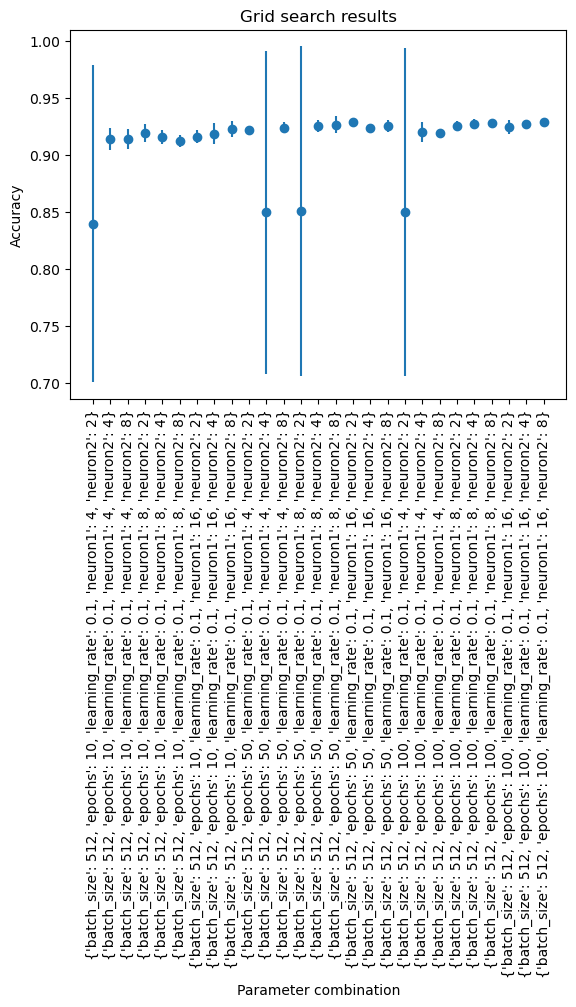

In [98]:
import matplotlib.pyplot as plt

# Get the mean test scores and standard deviations for each parameter combination
mean_scores = grid_result.cv_results_['mean_test_score']
std_scores = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Plot the results
plt.errorbar(range(len(params)), mean_scores, yerr=std_scores, fmt='o')
plt.xticks(range(len(params)), [str(p) for p in params], rotation=90)
plt.xlabel('Parameter combination')
plt.ylabel('Accuracy')
plt.title('Grid search results')
plt.show()
